In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import glob
import time

# Duration

In [ ]:

user = str(1)

# Weighted
# 01_Martina   ---- 1
# 01_Ming      ---- 2
# 01_Peter     ---- 3
# 01_ZiJun     ---- 4

# Latency
# 00_Dong      ---- 1
# 00_Kelin--   ---- 2
# 00_Mariya    ---- 3
# 00_Mat--     ---- 4
# 00_Wei       ---- 5
# 01_Yukun     ---- 6

path = 'C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/Human/Digby/com/Duration/'
csv_files = glob.glob(path +'/*.csv')
d_df_lst = [pd.read_csv(i) for i in csv_files]

# EDA ---> 0g, 500g, 1kg
duration_one_eda = d_df_lst[0]  
duration_two_eda = d_df_lst[3] 
duration_three_eda = d_df_lst[6] 

# HR
duration_one_hr = d_df_lst[1]  
duration_two_hr = d_df_lst[4] 
duration_three_hr = d_df_lst[7] 

# TEMP
duration_one_temp = d_df_lst[2]  
duration_two_temp = d_df_lst[5] 
duration_three_temp = d_df_lst[8] 


hr = [duration_one_hr, duration_two_hr,duration_three_hr]
eda = [duration_one_eda, duration_two_eda,duration_three_eda]
temp =  [duration_one_temp, duration_two_temp,duration_three_temp]

# Resting

In [ ]:
path = 'C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/Human/Digby/com/Rest/'
csv_files = glob.glob(path +'/*.csv')
r_df_lst = [pd.read_csv(i) for i in csv_files]

# EDA
r_one_eda = r_df_lst[0]  
r_two_eda = r_df_lst[3] 
r_three_eda = r_df_lst[6] 

# HR
r_one_hr = r_df_lst[1]  
r_two_hr = r_df_lst[4] 
r_three_hr = r_df_lst[7] 

# TEMP
r_one_temp = r_df_lst[2]  
r_two_temp = r_df_lst[5] 
r_three_temp = r_df_lst[8] 


hr_r = [r_one_hr, r_two_hr,r_three_hr]
eda_r = [r_one_eda, r_two_eda,r_three_eda]
temp_r = [r_one_temp, r_two_temp,r_three_temp]


# a = rest()
# a[0]  ---> eda_r
# a[0][0]  ---> eda_r[0] ---> r_one_eda
def rest(data =hr_r, data_2 = eda_r, data_3 = temp_r):
    col_name = set(['distance','IBI_1'])
    for i in range(0,len(data)):
        data[i].drop('timeStamp', axis = 1, inplace = True)
        data_2[i].drop('timeStamp', axis = 1, inplace = True)
        data_3[i].drop('timeStamp', axis = 1, inplace = True)

        if col_name.issubset(data[i].columns):
            data[i].drop(['distance','IBI_1'], axis = 1, inplace = True)  

        if col_name.issubset(data[i].columns):
            data_2[i].drop(['distance','IBI_1'], axis = 1, inplace = True)  

    return data

rest()

# Statistic frame of the data for confirming the plateau region

In [955]:
from scipy import stats
from itertools import chain

num_sets = 3
def general_trend_stat(sets):
  hold = [ [] for i in range(0,num_sets) ]
  stat_frame = [pd.DataFrame() for k in range(num_sets)]

  # for each data set/ condition, calcualte the stats
  for k in range(0, num_sets):
    x = range(0, len(sets[k]))
    for column in sets[k]:
      slope, intercept, r_value, p_value, std_err = stats.linregress(x, sets[k].loc[:,column])
      hold[k].append((slope,r_value,p_value,std_err))

    stat_frame[k] = pd.DataFrame(hold[k], columns = ['slope', 'r_value', 'p_value', 'std_err'])
  return stat_frame



In [956]:
hr_pct = general_trend_stat(hr)
eda_pct = general_trend_stat(eda)
temp_pct = general_trend_stat(temp)

hr_pct[0]

,slope,r_value,p_value,std_err
0,-0.056282,-0.146584,2.637384e-01,0.049871
1,0.041035,0.119973,3.612119e-01,0.044587
2,0.247012,0.555659,4.054021e-06,0.048530
3,-0.291384,-0.685679,1.495273e-09,0.040617
4,-0.048595,-0.134500,3.055609e-01,0.047010
5,0.125071,0.271930,3.556787e-02,0.058117
6,0.166459,0.299017,2.029613e-02,0.069752
7,-0.108599,-0.260831,4.412757e-02,0.052778
8,0.210005,0.661479,8.735752e-09,0.031264
9,0.060508,0.234206,7.168185e-02,0.032980


In [957]:
hr_pct[0]

,slope,r_value,p_value,std_err
0,-0.056282,-0.146584,2.637384e-01,0.049871
1,0.041035,0.119973,3.612119e-01,0.044587
2,0.247012,0.555659,4.054021e-06,0.048530
3,-0.291384,-0.685679,1.495273e-09,0.040617
4,-0.048595,-0.134500,3.055609e-01,0.047010
5,0.125071,0.271930,3.556787e-02,0.058117
6,0.166459,0.299017,2.029613e-02,0.069752
7,-0.108599,-0.260831,4.412757e-02,0.052778
8,0.210005,0.661479,8.735752e-09,0.031264
9,0.060508,0.234206,7.168185e-02,0.032980


## Find the plateau using plots

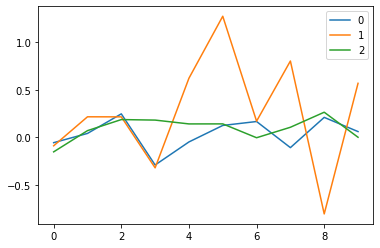

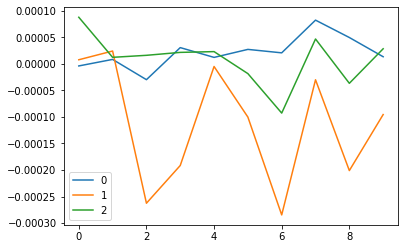

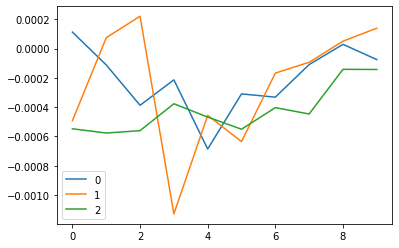

In [958]:
def plt_slope(name, sets):
  
  for i in range(num_sets):
    x = range(0, len(sets[i]))
    y = sets[i]['slope']
    l = name+' slope '+str(i+1)

    plt.plot(x, y, label = i)
    plt.legend()
  plt.show()

plt_slope('HR', hr_pct)
plt_slope('EDA', eda_pct)
plt_slope('TEMP', temp_pct)

# concat the stable region

In [959]:
def stable_regions(sets):
  set_1 = sets[0].columns[6:]
  set_2 = sets[1].columns[6:]
  set_3 = sets[2].columns[6:]

  data_stable_1 = sets[0].loc[:, set_1]
  data_stable_2 = sets[1].loc[:, set_2]
  data_stable_3 = sets[2].loc[:, set_3]

  data_stable_1.columns = ['set 1','set 1','set 1','set 1']
  data_stable_2.columns = ['set 2','set 2','set 2','set 2']
  data_stable_3.columns = ['set 3','set 3','set 3','set 3']

  return data_stable_1, data_stable_2, data_stable_3

hr_stable = stable_regions(hr)
eda_stable = stable_regions(eda)
temp_stable = stable_regions(temp)

In [960]:

# uncomment below to get the row mean (across different trials) of the stable region
# def row_mean(data):
#   s1_row_mean = data[0].mean(axis = 1)
#   s2_row_mean = data[1].mean(axis = 1)
#   s3_row_mean = data[2].mean(axis = 1)
  
#   row_m_stable = pd.concat( [s1_row_mean, s2_row_mean, s3_row_mean], axis = 1)
#   row_m_stable.columns = ['data set1','data set2','data set3']
  
#   return row_m_stable


# uncomment below to get the col mean among each trial
def trial_mean(data):
  s1_t_mean = data[0].mean(axis = 0)
  s2_t_mean = data[1].mean(axis = 0)
  s3_t_mean = data[2].mean(axis = 0)
  
  col_m_stable = pd.concat( [s1_t_mean, s2_t_mean, s3_t_mean])
  # row_m_stable.columns = ['data set1','data set2','data set3']
  
  return col_m_stable



def concat_rest(name, data):
  rest = pd.concat( [data[0], data[1], data[2]], axis = 1)
  col_1 = str(name) +'_rest_1'
  col_2 = str(name) +'_rest_2'
  col_3 = str(name) +'_rest_3'
  rest.columns = [col_1, col_2, col_3]
  return rest


Column mean for resting & row mean for duration

In [961]:
hr_rest_mean = concat_rest('HR',hr_r).mean()
eda_rest_mean = concat_rest('EDA', eda_r).mean()
temp_rest_mean = concat_rest('TEMP', temp_r).mean()


In [962]:

# Uncomment below for taking the avg of each trial of the stable data

hr_mean = trial_mean(hr_stable)
eda_mean =trial_mean(eda_stable)
temp_mean = trial_mean(temp_stable)


# Uncomment below for taking the avg of the row and col of the data
# hr_row_mean  = row_mean(hr_stable)
# eda_row_mean  = row_mean(eda_stable)
# temp_row_mean  = row_mean(temp_stable)
# # plt.plot(range(0,len(hr_row_mean)), hr_row_mean.loc[:,'data set1'], label = 'set 1')
# # plt.plot(range(0,len(hr_row_mean)), hr_row_mean.loc[:,'data set2'],label = 'set 2')
# # plt.plot(range(0,len(hr_row_mean)), hr_row_mean.loc[:,'data set3'],label = 'set 3')
# # plt.legend()

# def col_mean(data):
#   col_m = data.mean()
#   col_mean_frame = pd.DataFrame(data = [col_m]) # without [] it reutrns 3 rows of data
#   return col_mean_frame

# hr_mean = col_mean(hr_row_mean)
# eda_mean = col_mean(eda_row_mean)
# temp_mean = col_mean(temp_row_mean)

In [963]:
# d1 = set 1, d2 = set 2, d3 = set 3
print(hr_mean)
print(hr_rest_mean)

set 1     86.663890
set 1     86.600697
set 1     77.441317
set 1     76.163420
set 2     72.603068
set 2     92.057644
set 2    103.115072
set 2     97.433604
set 3     70.130980
set 3     76.177639
set 3     72.315029
set 3     70.148666
dtype: float64
HR_rest_1    69.018325
HR_rest_2    57.756737
HR_rest_3    63.125926
dtype: float64


# Subtract each set of the heart rate data against its own resting rate data

In [964]:
# step = 4
# ls = []
# for i in range(0,len(hr_mean),step):
#     ls.append(hr_mean[i:i+step])
# ls

In [965]:
def final(duration, rest, step = 4, ls=[], num_sets = 3):
    final_data = [[] for i in range(0,num_sets)]
    for i in range(0,len(duration), step):
        ls.append(duration[i:i+step])
    for j in range(0, num_sets):
        final_data[j] = ls[j] - rest[j]
    return final_data


final_hr[0] ---> the 4 stable trial heart rate deviation from resting

In [966]:
final_hr = final(hr_mean,hr_rest_mean)
final_eda = final(eda_mean,eda_rest_mean)
final_temp =  final(temp_mean, temp_rest_mean)


In [967]:
final_hr = pd.concat(final_hr)
final_eda = pd.concat(final_eda)
final_temp = pd.concat(final_temp)

In [968]:
combine_3 = pd.concat([final_hr, final_eda, final_temp], axis =1)
combine_3.reset_index(drop=False,inplace= True)
combine_3.columns = ['Sets','HR','EDA','TEMP']

In [969]:
combine_3

,Sets,HR,EDA,TEMP
0,set 1,17.645565,86.324800,55.108011
1,set 1,17.582371,86.261606,55.044817
2,set 1,8.422992,77.102227,45.885438
3,set 1,7.145095,75.824330,44.607541
4,set 2,14.846331,72.280084,41.594090
5,set 2,34.300907,91.734660,61.048666
6,set 2,45.358335,102.792089,72.106094
7,set 2,39.676867,97.110620,66.424626
8,set 3,7.005055,69.579852,36.695211
9,set 3,13.051713,75.626511,42.741870


# Save the combined data for each participant to local file

In [970]:
path = 'C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/Human/combine/'

# path = 'C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/Latency/combine/'
# path = 'C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/Weighted/combine/'

combine_3.to_csv(path+user+'.csv')

# Reading the downloaded combine files for all participant

In [52]:
# tst = 'Latency'
# tst = 'Weighted'
tst = 'Latency'

path = 'C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/All/Latency_Biosignals_4/'
csv_combine = glob.glob(path +'/*.csv')

# Read & reset the index of each data to be the user ID

lst = [pd.read_csv(i, index_col=[0]) for i in csv_combine]
# hold = [com_lst[j].set_index('User_ID') for j in range(0,len(com_lst))]
# This format is for ANOVA testing
combine_all = pd.concat(lst)
combine_all.to_csv(path+'combined_all'+'.csv')


NameError: name 'glob' is not defined

# Obtaining individual set data
As it is non-unique, it returns an array of True & False argument instead of index
set_1_loc = pd.Index(combine_all['Data Types']).get_loc('set_1')

In [993]:

def set_loc(set_name):
    set_loc = pd.Index(combine_all['Sets']).get_loc(set_name)
    ls = []
    for i in range(0,len(set_loc)):
        if set_loc[i]:
            ls.append(i)
    set_frame = combine_all.iloc[ls]
    return set_frame
set_loc('set 1').to_csv(path+'set_1_combine'+'.csv')
set_loc('set 2').to_csv(path+'set_2_combine'+'.csv')
set_loc('set 3').to_csv(path+'set_3_combine'+'.csv')

# If connection closed & only want plotting

In [977]:
tst

'Human'

In [1008]:

# path_1 = 'C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/'+tst+'/combine/set_1_combine.csv'
# path_2 = 'C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/'+tst+'/combine/set_2_combine.csv'
# path_3 = 'C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/'+tst+'/combine/set_3_combine.csv'

path_1 = path+'set_1_combine.csv'
path_2 = path+'set_2_combine.csv'
path_3 = path+'set_3_combine.csv'


ls = [pd.read_csv(i, index_col=[0]) for i in [path_1,path_2,path_3]]
# pd.concat(ls)

# latency no.5

In [1009]:
# s1 = set_loc('set_1')
# s2 = set_loc('set_2')
# s3 = set_loc('set_3')

s1,s2,s3 = ls[0],ls[1],ls[2]
s1

,Sets,HR,EDA,TEMP
0,set 1,1.845829,87.535206,55.468222
1,set 1,3.614221,89.303598,57.236614
2,set 1,3.160637,88.850014,56.783031
3,set 1,8.996707,94.686085,62.619101
0,set 1,2.130976,91.752542,57.757305
1,set 1,-6.756434,82.865132,48.869895
2,set 1,-25.188157,64.433409,30.438172
3,set 1,-12.066519,77.555047,43.559810
0,set 1,6.261082,76.567121,43.751377
1,set 1,4.151745,74.457784,41.642039


In [1012]:

def plt_sets(data_name, path = path, test =tst, outlier = True):
    print(path)

    s1_data = s1[data_name]
    s2_data = s2[data_name]
    s3_data = s3[data_name]
    data = [s1_data,s2_data,s3_data]
    flier = True

    # x = ['0ms delay', '150ms delay', '300ms delay']
    if test == 'Weighted' or 'Human':
        x =['0 g', '0.5 KG', '1 KG']
        x_l = 'Different levels of weights'
    else: 
        x = ['0ms delay', '150ms delay', '300ms delay']
        x_l = 'Different latency levels'

    if data_name =='HR':
        y_l = data_name+' variation (beats/minute)'
    elif data_name =='EDA':
        y_l = data_name+' variation (microsiemens -μS )'
    elif data_name =='TEMP':
        y_l = data_name+' variation (celsius - °C)'
    
    if outlier == True:
        flier = True
        inclusion = 'included'
    else: 
        flier = False
        inclusion = 'excluded'


    plt.figure(figsize =(7, 5))
    plt.title(data_name+' variation in 3 different '+test+' levels with outliers '+inclusion)
    plt.boxplot(data, labels=x, showfliers= flier)
    plt.xlabel(x_l)

    plt.ylabel(y_l)
    plt.savefig(path+data_name+' vaiation at different '+test+' level with outliers '+inclusion+'.jpg')

    plt.show()



C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/All/Latency_Biosignals_4/


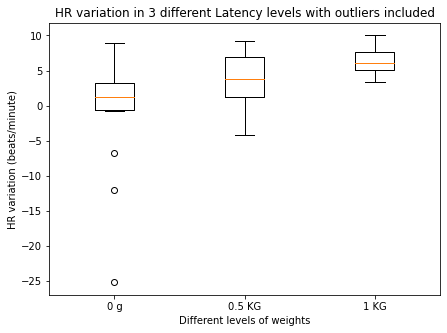

C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/All/Latency_Biosignals_4/


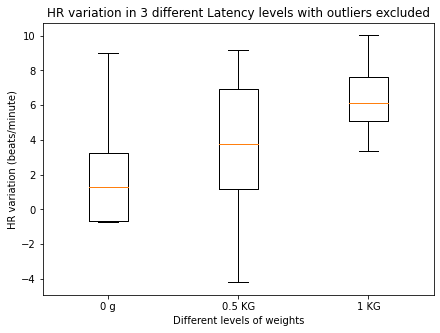

C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/All/Latency_Biosignals_4/


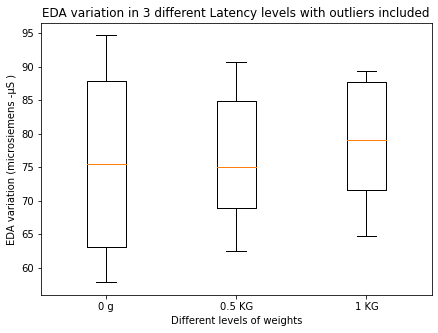

C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/All/Latency_Biosignals_4/


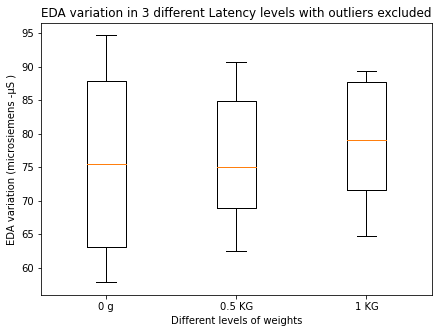

C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/All/Latency_Biosignals_4/


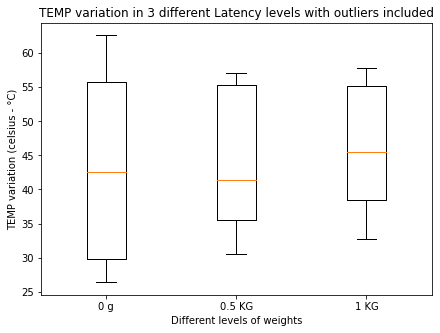

C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/All/Latency_Biosignals_4/


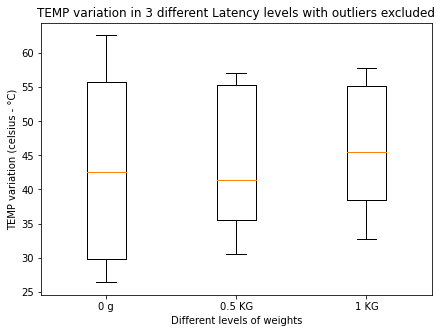

In [1013]:
plt_sets('HR', outlier= True)
plt_sets('HR', outlier= False)

plt_sets('EDA', outlier= True)
plt_sets('EDA', outlier= False)

plt_sets('TEMP', outlier= True)
plt_sets('TEMP', outlier= False)

# MAOVA

In [ ]:
from statsmodels.multivariate.manova import MANOVA
import numpy as np
import pandas as pd
l_bio = 'C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/All/Latency_Biosignals_4/combined_all.csv'
l_nasa = 'C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/All/Latency_NASA_4/combined_all.csv'

l_bio_6 = 'C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/All/Latency_Biosignals/combined_all.csv'
l_nasa_6 = 'C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/All/Latency_MASA/combined_all.csv'

w_bio = 'C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/All/Weighted_Biosignals/combined_all.csv'
w_nasa ='C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/All/Weighted_NASA/combined_all.csv'

human_bio = 'C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/All/Human_signal/combined_all.csv'
human_nasa = 'C:/Users/evach/Documents/MSc/Diss_data/3_set_baseline/All/Human_NASA/combined_all.csv'


l_bio = pd.read_csv(l_bio, index_col=[0])
l_nasa = pd.read_csv(l_nasa, index_col=[0])

       
def manova_bio(d):
    result = MANOVA.from_formula('HR + EDA + \
                            TEMP  ~ Sets', data=d)
    print(result.mv_test())

# def manova_nasa(d):
#     result = MANOVA.from_formula('HR + EDA + \
#                             TEMP  ~ Sets', data=d)
#     print(result.mv_test())

# # # latency
manova_bio(l_bio)
# manova_nasa(l_nasa)

# # weight
# manova(w_bio)
# manova(w_nasa)

# # human
# manova(human_bio)
# manova(human_nasa)

In [51]:
l_nasa

,Test name,Sets,0,1,2,3,4,5,6,7,8,9
0,Mental demand,set 1,30.0,10.0,40.0,20.0,30.0,40.0,35.0,20.0,25.0,30.0
1,Mental demand,set 2,65.0,70.0,60.0,50.0,40.0,30.0,20.0,10.0,35.0,15.0
2,Mental demand,set 3,70.0,80.0,70.0,80.0,60.0,90.0,70.0,70.0,50.0,60.0
3,Physical demand,set 1,20.0,10.0,50.0,20.0,30.0,45.0,35.0,20.0,30.0,30.0
4,Physical demand,set 2,60.0,70.0,60.0,50.0,60.0,30.0,20.0,15.0,40.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19,Motivation,set 2,60.0,60.0,70.0,70.0,80.0,80.0,80.0,80.0,85.0,85.0
20,Motivation,set 3,70.0,75.0,80.0,85.0,80.0,80.0,70.0,80.0,40.0,50.0
21,bnb score,set 1,7.0,8.0,4.0,6.0,11.0,10.0,11.0,15.0,17.0,15.0
22,bnb score,set 2,3.0,5.0,4.0,3.0,3.0,6.0,2.0,4.0,4.0,5.0


In [28]:

def manova_nasa(d):
    result = MANOVA.from_formula('Performance + Frustration + Motivation	 \
                                   ~ Sets', data=d)
    print(result.mv_test())

manova_nasa(a)

LinAlgError: Singular matrix

In [20]:
tst = [l_bio,l_nasa,l_bio_6]
tst

NameError: name 'l_nasa' is not defined

In [9]:
print(latency_bio_maov.mv_test())



                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value   Num DF  Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda   0.0051 3.0000 43.0000 2770.8349 0.0000
         Pillai's trace   0.9949 3.0000 43.0000 2770.8349 0.0000
 Hotelling-Lawley trace 193.3141 3.0000 43.0000 2770.8349 0.0000
    Roy's greatest root 193.3141 3.0000 43.0000 2770.8349 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
              Sets          Value  Num DF  Den DF F Value Pr > F
----------------------------------------------------------------
              Wilks' lambda 0.7326 6.0000 86.0000  2.4131 0.0333
             Pillai's trace 0.2762 6.0000 88.